# Pymaceuticals Inc.
---
### Background
- Pymaceuticals Inc., a new pharmaceutical company that specializes in anti-cancer medications, began screening for potential treatments for squamous cell carcinoma (SCC) which is a commonly occuring form of skin cancer.
- In a recent clinical study, 248 mice that were identified with SCC tumors received a variety of 9 drug treatment regimens and a placebo. The study was conducted using approximately an equal number of female and male mice (49.4% to 50.6%).  Over the course of 45 days, the tumor development/growth was observed and measured.
- The objective of the clinical study was to observe and compare the performance of Pymaceuticals' drug of interest, Capomulin, against the other treatment regimens.

### Analysis Summary
- Pymaceuticals' drug of interest, Capomulin, was among the top 2 performing drug regimens. Ramicane had the lowest obeserved average and median tumor volume (in mm3), with the lowest standard deviation and standard of error, followed by Capomulin.
- Upon reviewing the Boxplots of the final tumor volume (in mm3) across the four treatment regimens of Capomulin, Ramicane, Infubinol, and Ceftamin, it is evident how Capomulin and Ramicane outperform the other 2 treatments.  Infubinol had one outlier, at 36.3 mm3.
- Mouse ID l509 had a reduction in tumor volume (mm3) after day 20 and again after day 30, with the Capomulin treatment.
- There is a strong positive linear relationship (correlation coefficient=0.84) between the mice's weight and tumor volume for those receiving the Capomulin treatment regimen.  That is, as the mouse's weight increases by 1 gram, the average tumor volume increases by 0.95 mm3.

In summary, this phase of the clinical study has demonstrated that Capomulin is a viable anti-cancer medication in treating SCC.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regiman_tumor_volume_avg = study_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
regiman_tumor_volume_median = study_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
regiman_tumor_volume_variance = study_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
regiman_tumor_volume_stdev = study_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
regiman_tumor_volume_sterr = study_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

regiman_tumor_volume_summary = pd.DataFrame({"Mean Tumor Volume":regiman_tumor_volume_avg,
                                 "Median Tumor Volume":regiman_tumor_volume_median,
                                 "Tumor Volume Variance":regiman_tumor_volume_variance,
                                 "Tumor Volume Std. Dev.":regiman_tumor_volume_stdev,
                                 "Tumor Volume Std. Err.":regiman_tumor_volume_sterr})

# Display the DataFrame
regiman_tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regiman_tumor_volume_summary_stat = study_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

# Display the Summary Statistics
regiman_tumor_volume_summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

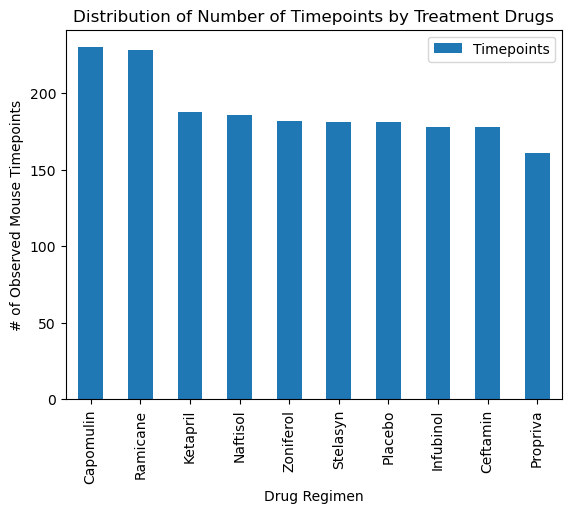

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_timepoints = study_data_complete["Drug Regimen"].value_counts()
drug_regimen_name = study_data_complete["Drug Regimen"].unique()
timepoints_by_regimen = pd.DataFrame({"Timepoints":number_timepoints,"Drug Regimen":drug_regimen_name})
timepoints_by_regimen.set_index("Drug Regimen")
timepoints_by_regimen_barplot = timepoints_by_regimen.plot(kind='bar',title="Distribution of Number of Timepoints by Treatment Drugs",xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints",rot=90)

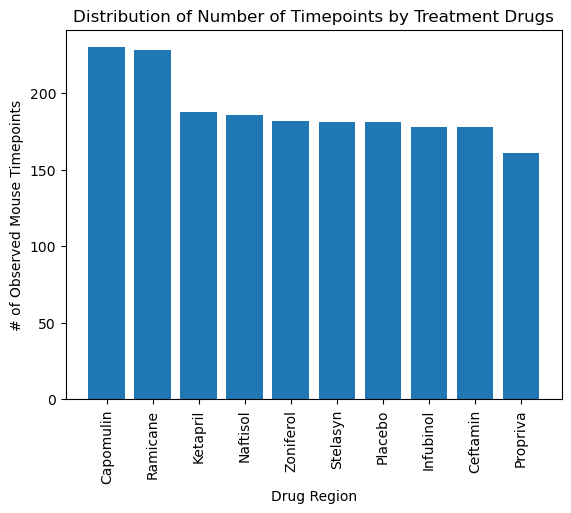

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = timepoints_by_regimen.index
plt.title("Distribution of Number of Timepoints by Treatment Drugs")
plt.xlabel("Drug Region")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.bar(x_axis,number_timepoints)
plt.show()

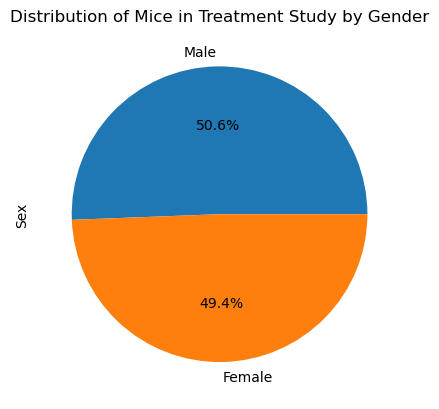

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = study_data_complete["Sex"].value_counts()
mouse_sex_df = pd.DataFrame({"Sex":mouse_sex})
mouse_sex_pieplot = mouse_sex.plot(kind='pie',autopct="%1.1f%%",title="Distribution of Mice in Treatment Study by Gender",ylabel="Sex",rot=90)

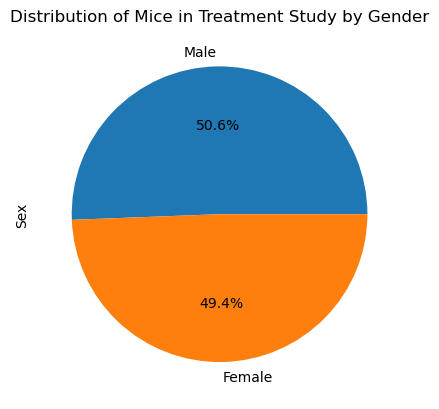

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex_df.index
plt.title("Distribution of Mice in Treatment Study by Gender")
plt.ylabel("Sex")
plt.pie(mouse_sex,labels=labels,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor_volume = clean_study_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor_volume = greatest_tumor_volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_greatest_tumor_clean_study = greatest_tumor_volume.merge(clean_study_data_complete,on=["Mouse ID","Timepoint"],how="left")

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
select_treatment_regimen_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in select_treatment_regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_greatest_tumor_clean_study.loc[merged_greatest_tumor_clean_study["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)|(final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


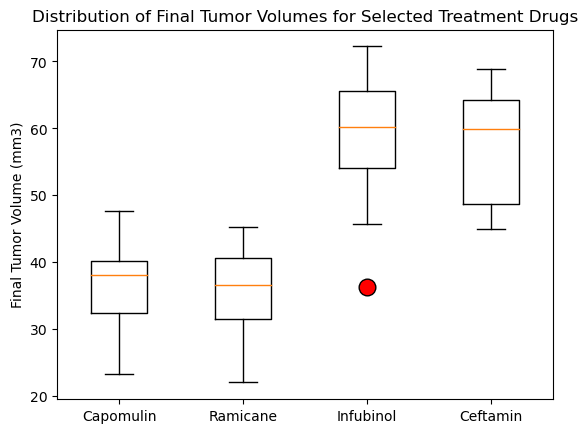

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fliers_style = dict(markerfacecolor='red',markersize=12)
plt.title("Distribution of Final Tumor Volumes for Selected Treatment Drugs")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_volume_list,labels=select_treatment_regimen_list,flierprops=fliers_style)
plt.show()

## Line and Scatter Plots

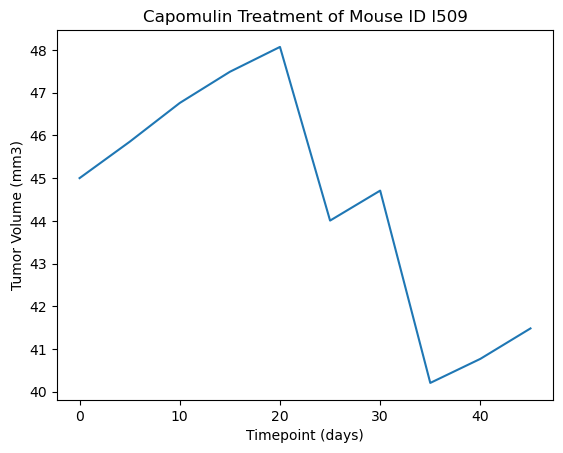

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse (Mouse ID=l509) treated with Capomulin
capomulin_data = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
specific_mouseid_data = capomulin_data.loc[capomulin_data["Mouse ID"]=="l509"]
plt.title("Capomulin Treatment of Mouse ID l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(specific_mouseid_data["Timepoint"],specific_mouseid_data["Tumor Volume (mm3)"])
plt.show()

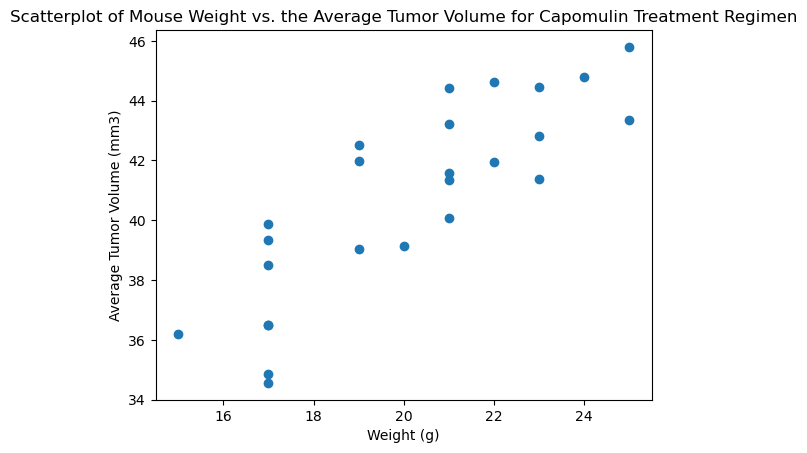

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
capomulin_average = capomulin_data.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.title("Scatterplot of Mouse Weight vs. the Average Tumor Volume for Capomulin Treatment Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

The Pearson Correlation Coefficient between Mouse Weight and the Average Tumor Volume for Capomulin Treatment Regimen is 0.84
LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


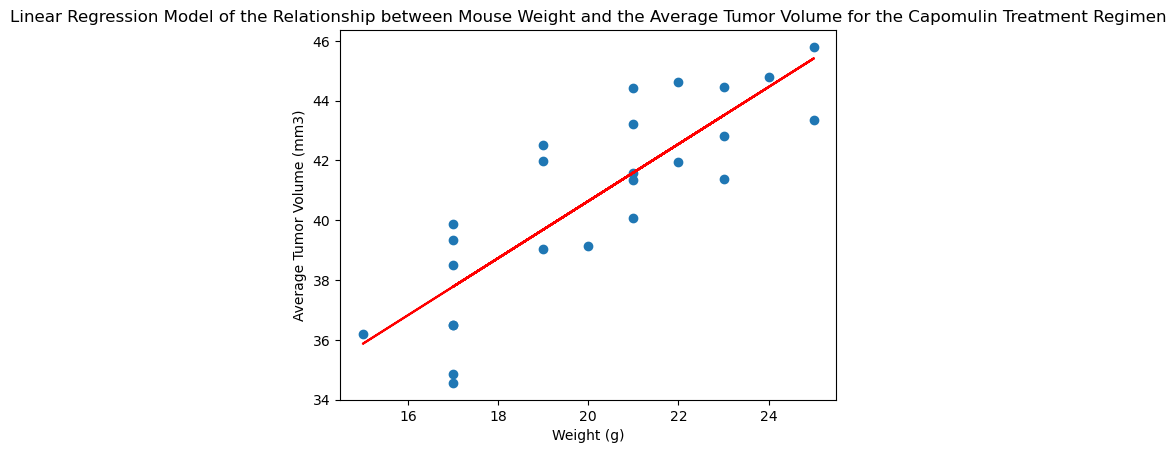

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coef=round(st.pearsonr(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])[0],2)
print(f"The Pearson Correlation Coefficient between Mouse Weight and the Average Tumor Volume for Capomulin Treatment Regimen is {corr_coef}")
linear_regress_model = st.linregress(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
print(linear_regress_model)

y_values = capomulin_average["Weight (g)"]*linear_regress_model[0]+linear_regress_model[1]
plt.title("Linear Regression Model of the Relationship between Mouse Weight and the Average Tumor Volume for the Capomulin Treatment Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"],y_values,color="red")
plt.show()